# Visualize scores

## Between splits
no-heg/with-heg vs no-control/with-control

,no_special > with_special,p < 0.05,pvalue,statistic
dataset,,,,
elsherief2021,True,False,0.440232,-0.887391
kennedy2020,False,False,0.449910,0.866610
salminen2018,True,False,0.531664,-0.704911
sbic,False,False,0.820650,0.247278
cad,True,False,0.604421,-0.576947
hatexplain,True,True,0.021439,-4.424756


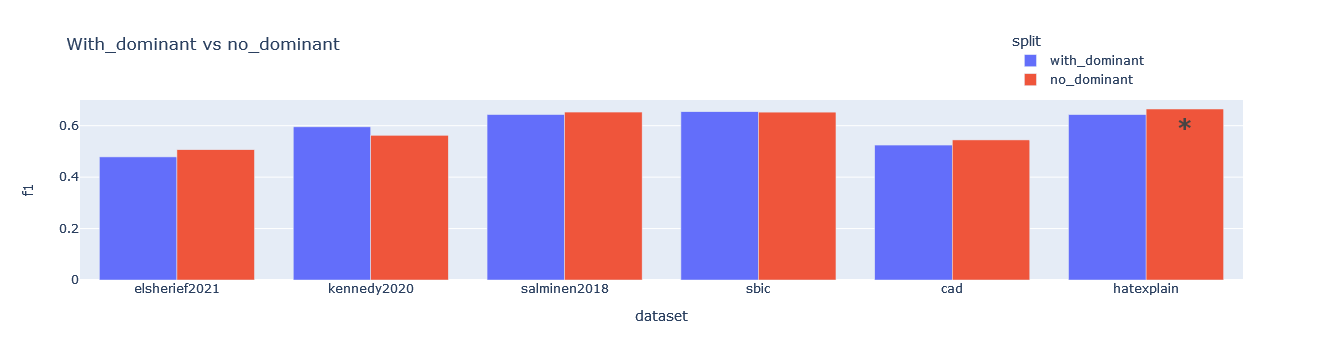

,no_special > with_special,p < 0.05,pvalue,statistic
dataset,,,,
elsherief2021,False,False,0.878053,0.166916
kennedy2020,True,False,0.227105,-1.514613
salminen2018,False,False,0.547451,0.676067
sbic,False,False,0.277099,1.324838
cad,False,False,0.707313,0.413057
hatexplain,True,False,0.478438,-0.807558


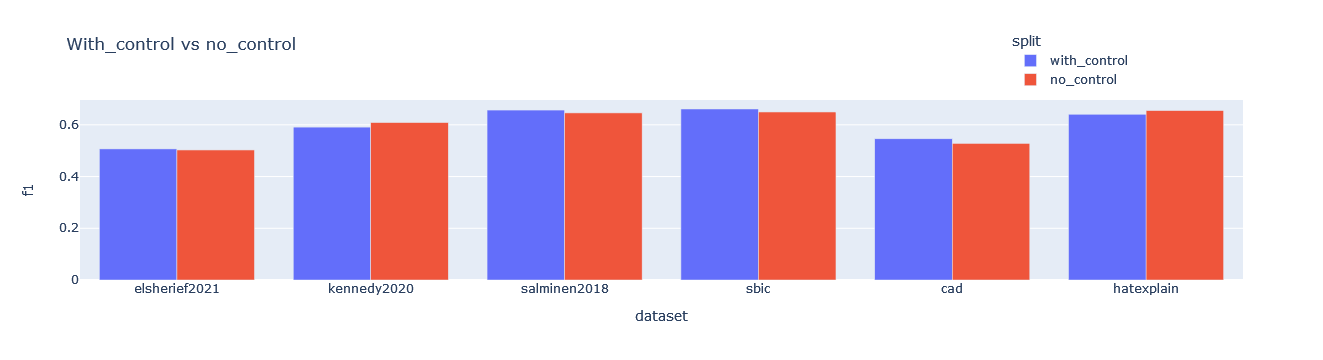

In [5]:
import pandas as pd
import plotly.express as px
from IPython.display import display

clf_name = 'bert'
cv_runs = 2

titles = {'hegsplits': 'With_dominant vs no_dominant',
          'controlsplits': 'With_control vs no_control'}
for splits in ['hegsplits', 'controlsplits']:
# for splits in ['hegsplits']:
    
    name = f'/usr0/home/mamille3/hegemonic_hate/output/{clf_name}_{splits}_{cv_runs}x2cv'
    
    # Load scores
    scores_path = f'{name}_f1.csv'
    f1s = pd.read_csv(scores_path, index_col=0)
    if 'dataset' not in f1s.columns:
        f1s.reset_index(inplace=True)
    # display(f1s)
        
    # Load significance
    sigs_path = f'{name}_sigs.csv'
    sigs = pd.read_csv(sigs_path, index_col=0)
    display(sigs)
    
    # Add significant difference markers
    f1s = f1s.join(sigs, on='dataset')
    f1s['sig'] = [(split, better, sig) in [('no_special', True, True), ('with_special', False, True)] for (split, better, sig) in zip(
        f1s['split'], f1s['no_special > with_special'], f1s['p < 0.05'])]
    f1s['sig*'] = f1s.sig.map(lambda x: '<b>*</b>' if x else '')
    # display(f1s)

    # Plot
    if splits == 'hegsplits':
        f1s = f1s.replace('with_special', 'with_dominant').replace('no_special', 'no_dominant')
    elif splits == 'controlsplits':
        f1s = f1s.replace('with_special', 'with_control').replace('no_special', 'no_control')
    fig = px.bar(f1s, x='dataset', y='f1', color='split', barmode='group', title=titles[splits], text='sig*')
    fig.update_layout(legend=dict(
        yanchor='top',
        y=1.4,
        xanchor='left',
        x=0.8
    ))
    fig.update_traces(textfont_size=24)
    fig.show()

In [2]:
f1s

,split,f1,no_special > with_special,p < 0.05,pvalue,statistic,sig,sig*
dataset,,,,,,,,
elsherief2021,with_control,0.506807,False,False,0.878053,0.166916,False,
elsherief2021,no_control,0.502824,False,False,0.878053,0.166916,False,
kennedy2020,with_control,0.591121,True,False,0.227105,-1.514613,False,
kennedy2020,no_control,0.608646,True,False,0.227105,-1.514613,False,
salminen2018,with_control,0.657074,False,False,0.547451,0.676067,False,
salminen2018,no_control,0.646091,False,False,0.547451,0.676067,False,
sbic,with_control,0.661133,False,False,0.277099,1.324838,False,
sbic,no_control,0.649641,False,False,0.277099,1.324838,False,
cad,with_control,0.545996,False,False,0.707313,0.413057,False,


## Between classifiers

In [6]:
import pandas as pd
import plotly.express as px
from IPython.display import display

clfs = [('bert', 2), ('lr', 5)] # (clf_name, cv_runs)

titles = {'hegsplits': 'With_dominant vs no_dominant',
          'controlsplits': 'With_control vs no_control'}
scores_dict = {}
# for splits in ['hegsplits', 'controlsplits']:
for clf_name, cv_runs in clfs:
    for splits in ['hegsplits']:

        name = f'/usr0/home/mamille3/hegemonic_hate/output/{clf_name}_{splits}_{cv_runs}x2cv'

        # Load scores
        scores_path = f'{name}_f1.csv'
        f1s = pd.read_csv(scores_path, index_col=0)
        if splits == 'hegsplits':
            f1s = f1s.replace('with_special', 'with_dominant').replace('no_special', 'no_dominant')
        elif splits == 'controlsplits':
            f1s = f1s.replace('with_special', 'with_control').replace('no_special', 'no_control')
        f1s['clf'] = clf_name
        scores_dict[(clf_name, cv_runs)] = f1s

scores = pd.concat(scores_dict.values())
scores

,dataset,split,f1,clf
0,elsherief2021,with_dominant,0.478686,bert
1,elsherief2021,no_dominant,0.506460,bert
2,kennedy2020,with_dominant,0.595504,bert
3,kennedy2020,no_dominant,0.562700,bert
4,salminen2018,with_dominant,0.643193,bert
5,salminen2018,no_dominant,0.653047,bert
6,sbic,with_dominant,0.654167,bert
7,sbic,no_dominant,0.652734,bert
8,cad,with_dominant,0.524793,bert
9,cad,no_dominant,0.544593,bert


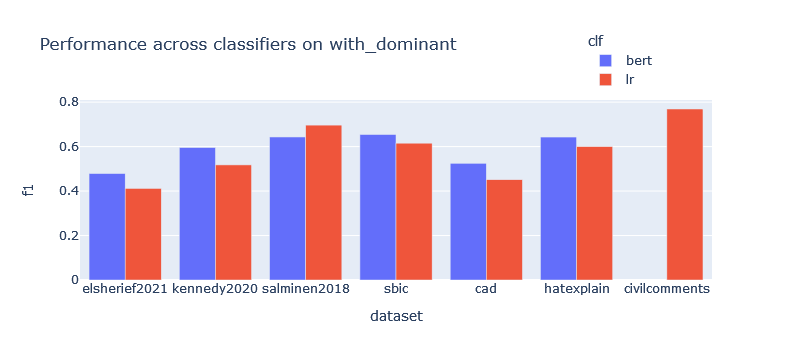

In [9]:
# Plot
selection = 'with_dominant'
fig = px.bar(scores.query('split == @selection'), x='dataset', y='f1', color='clf', barmode='group', 
             title=f'Performance across classifiers on {selection}')
fig.update_layout(legend=dict(
    yanchor='top',
    y=1.4,
    xanchor='left',
    x=0.8
))
fig.show()